In this assignment, students will be using the K-nearest neighbors 
algorithm to predict how many points NBA players scored in the 2013-2014 
season. 
 
A look at the data 
Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season. 
 
Download 'nba_2013.csv' file from this link: 
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0 

Here are some selected columns from the data: 
player - name of the player 
pos - the position of the player 
g - number of games the player was in 
gs - number of games the player started 
pts - total points the player scored 
There are many more columns in the data, mostly containing information about average player game performance over the course of the season. 

 Here are some selected columns from the data:

    player — name of the player
    pos — the position of the player
    g — number of games the player was in
    gs — number of games the player started
    pts — total points the player scored


In [319]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [320]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [321]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [322]:
"""RENAMING NBA FEATURES"""     
# Lets rename our train_set columns names with proper names 
nba.rename(columns={'bref_team_id':'brefTeamid','season_end': 'seasonEnd'}, inplace=True)
nba.columns

Index(['player', 'pos', 'age', 'brefTeamid', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'seasonEnd'],
      dtype='object')

In [323]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,seasonEnd
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [324]:
nba.isnull().any()#Check for null values

player        False
pos           False
age           False
brefTeamid    False
g             False
gs            False
mp            False
fg            False
fga           False
fg.            True
x3p           False
x3pa          False
x3p.           True
x2p           False
x2pa          False
x2p.           True
efg.           True
ft            False
fta           False
ft.            True
orb           False
drb           False
trb           False
ast           False
stl           False
blk           False
tov           False
pf            False
pts           False
season        False
seasonEnd     False
dtype: bool

In [325]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

In [326]:
#Let encode the feature which are not numerical.
for features in nba.columns:
    if nba[features].dtype == 'object': #its only applies to columns to with categorical strings
        nba[features] = pd.Categorical(nba[features]).codes # Replace strings with an integer

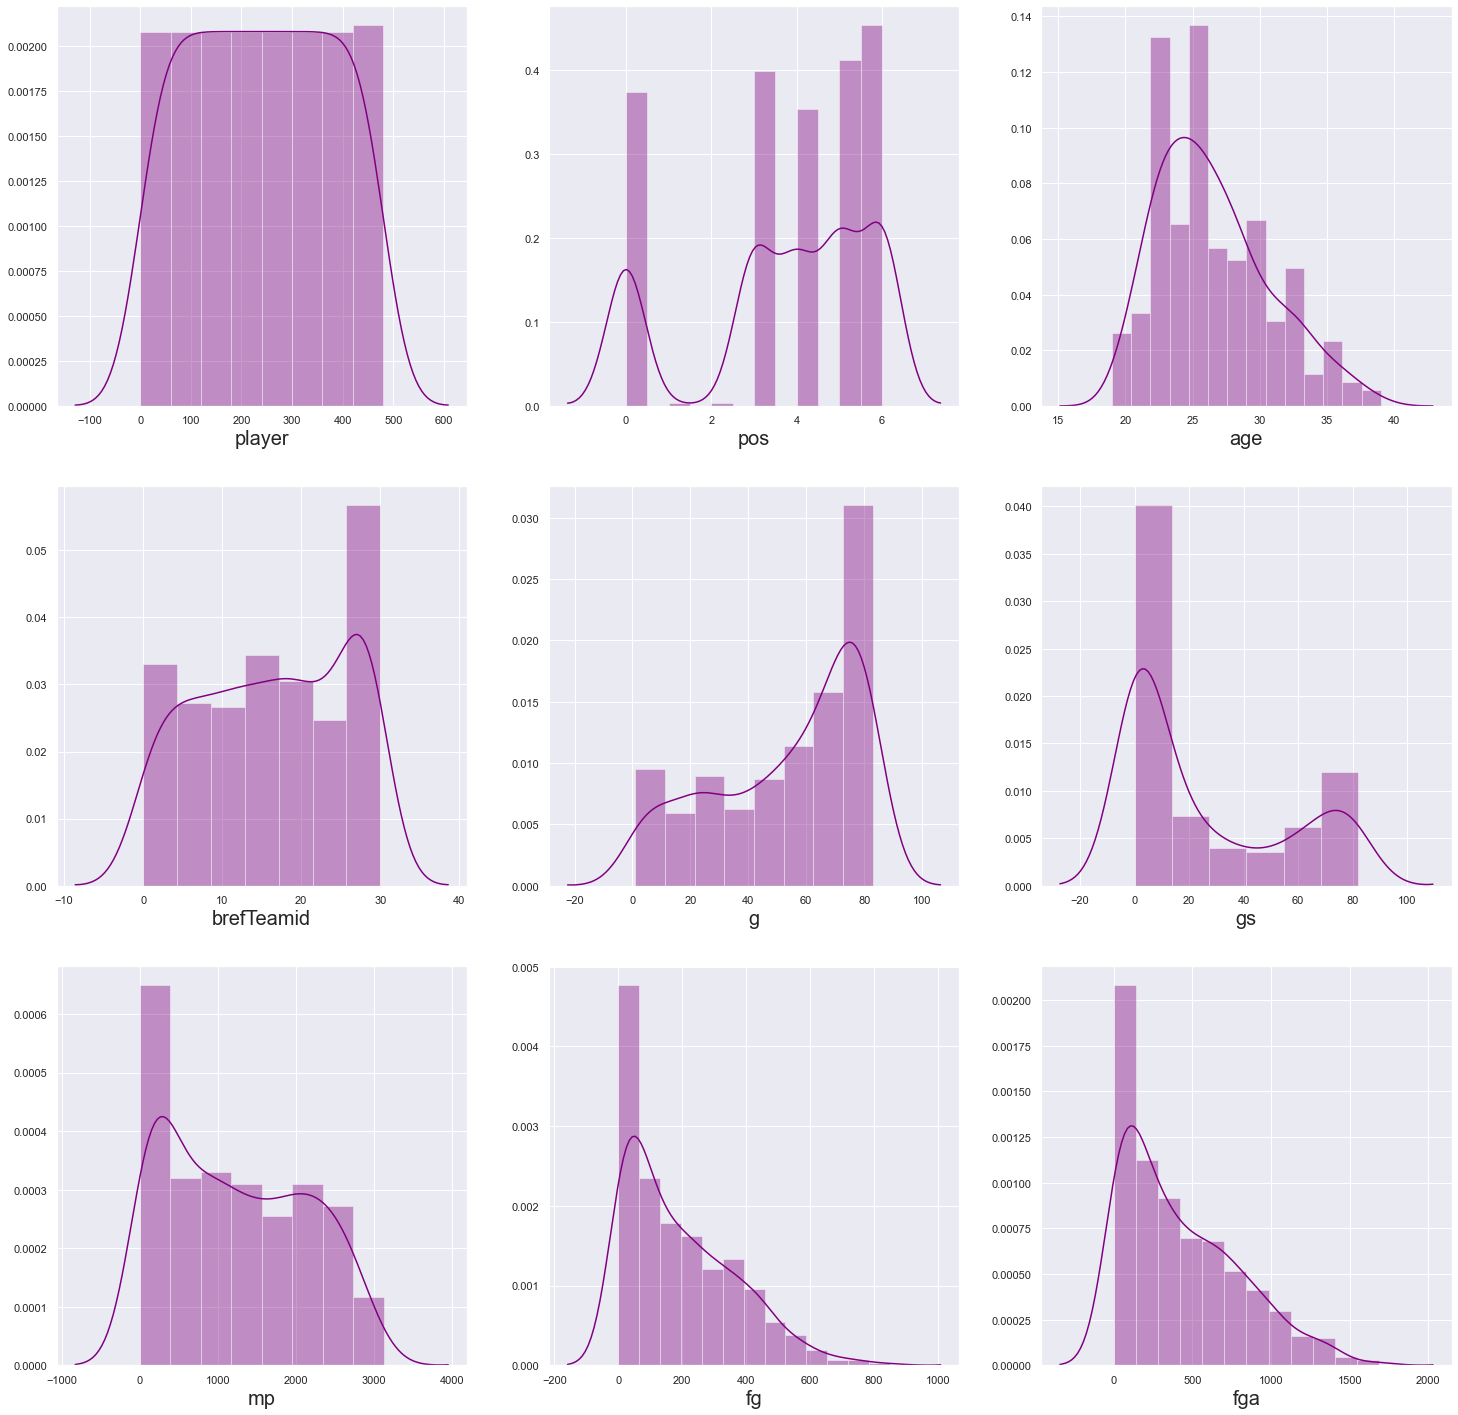

In [327]:
plt.figure(figsize=(25,25), facecolor='white')
plotno = 1
for col in nba:
    if plotno <=9 :     
        ax = plt.subplot(3,3,plotno)
        sns.distplot(nba[col], color ='purple')
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

We can some irregularities in few data for columns player, pos, brefTeamid, gs, mp, fg, fga which have values as 0.

In [329]:
# Replacing zero values with the mean of the column.
nba['player'] = nba['player'].replace(0,nba['player'].mean())
nba['pos'] = nba['pos'].replace(0,nba['pos'].mean())
nba['brefTeamid'] = nba['brefTeamid'].replace(0,nba['brefTeamid'].mean())
nba['gs'] = nba['gs'].replace(0,nba['gs'].mean())
nba['mp'] = nba['mp'].replace(0,nba['mp'].mean())
nba['fg'] = nba['fg'].replace(0,nba['fg'].mean())
nba['fga'] = nba['fga'].replace(0,nba['fga'].mean())

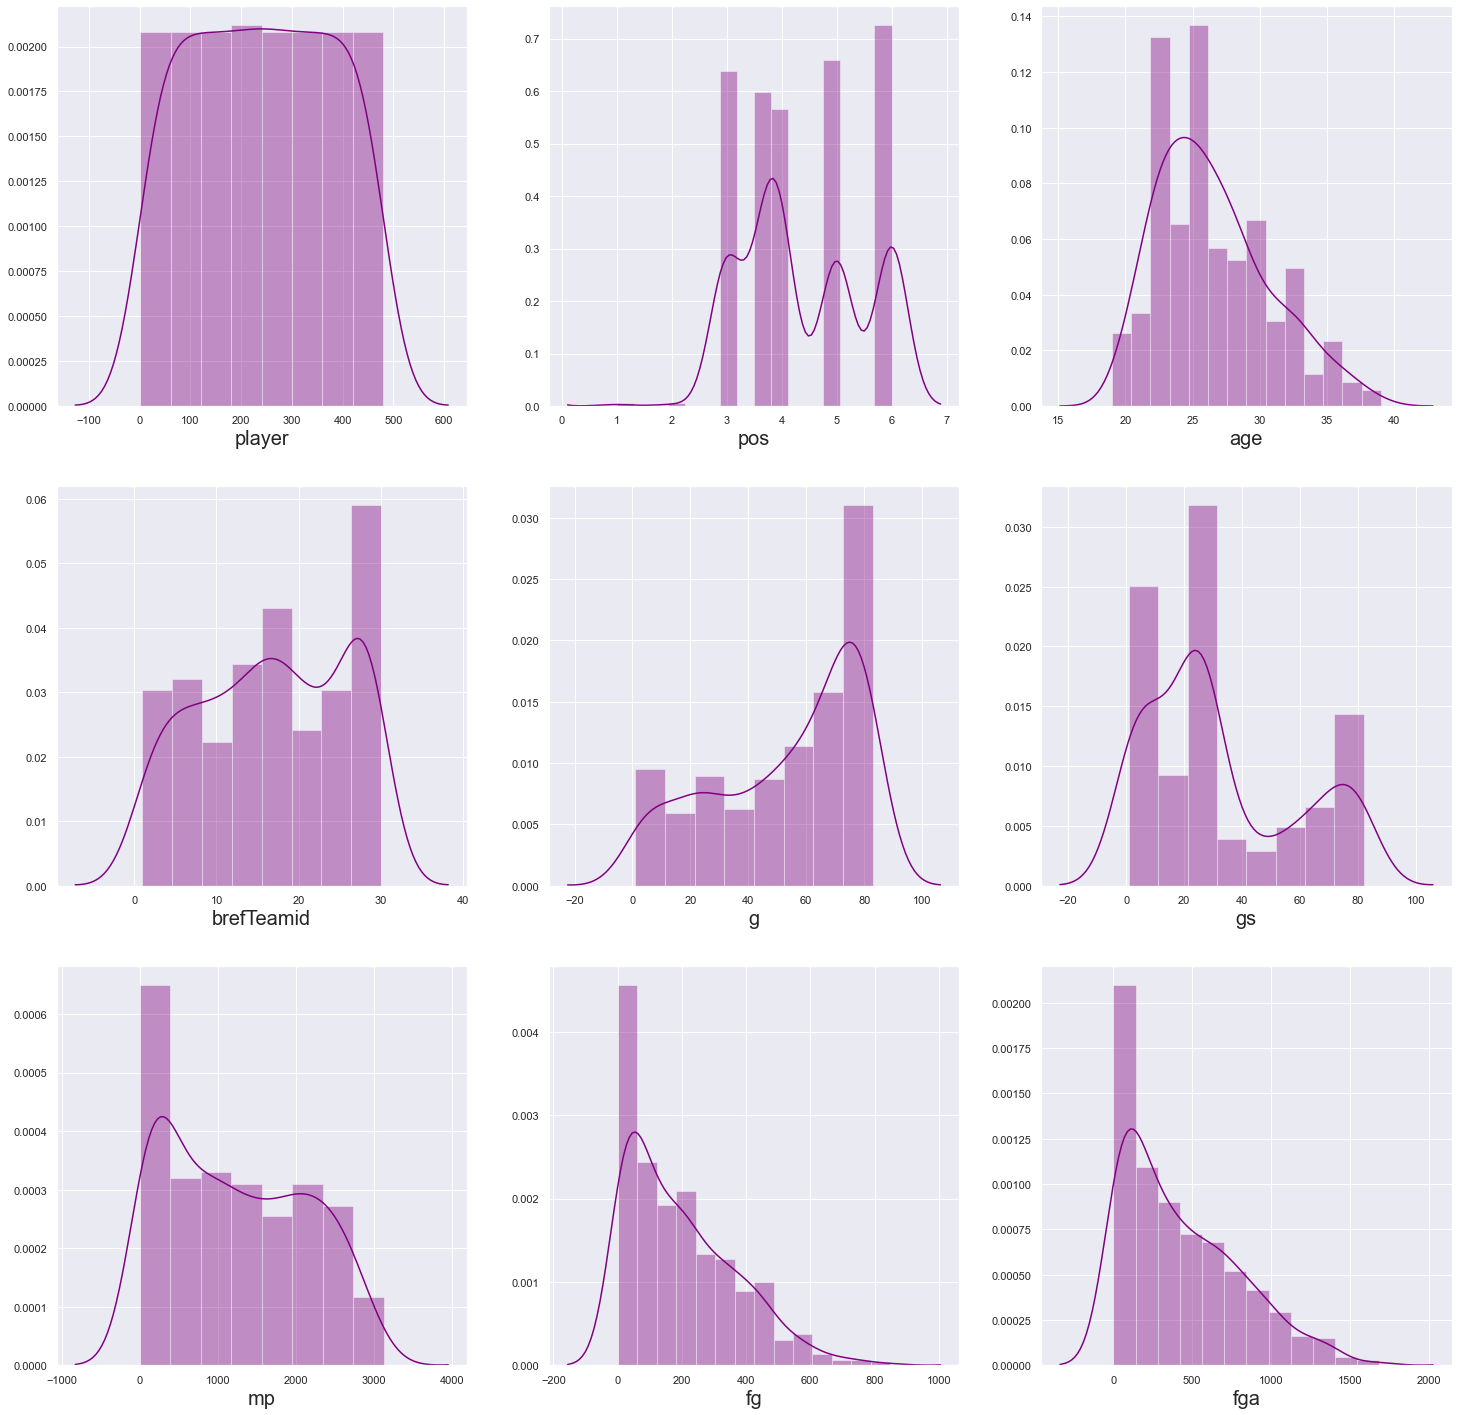

In [330]:
#After replacing 0 value. We have some graph transformation.
plt.figure(figsize=(25,25),facecolor='white')
plotno = 1
for col in nba:
    if plotno <=9 :     
        ax = plt.subplot(3,3,plotno)
        sns.distplot(nba[col], color ='purple')
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [331]:
# Choose only the numeric columns (we'll use these to compute euclidean distance)
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]

In [332]:
# Normalizing columns
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [333]:
nba_category = nba[['player','season']] # Categorical columns

In [334]:
nba = pd.concat([nba_category, nba_normalized], axis=1) #Concate indexes

In [335]:
# The columns that we will be making predictions with.
X = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]
# The column that we want to predict.
y = nba["pts"]

In [336]:
# Split our data in two different chunks(train set, test set)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [340]:
# check for increasing neighbour values to see which has the highest regression score
for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9169 for k_value: 1
Regression score is: 0.9453 for k_value: 2
Regression score is: 0.9540 for k_value: 3
Regression score is: 0.9558 for k_value: 4
Regression score is: 0.9535 for k_value: 5
Regression score is: 0.9512 for k_value: 6
Regression score is: 0.9517 for k_value: 7
Regression score is: 0.9558 for k_value: 8
Regression score is: 0.9540 for k_value: 9
Regression score is: 0.9521 for k_value: 10


In [341]:
knn = KNeighborsRegressor(n_neighbors = 4) # let consider k_value:4
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0013188
Regression score is: 0.9558


In [342]:
Test_With_Predicted = pd.DataFrame({'Actual Points': y_test.tolist(), 'Predicted Points': y_pred.tolist()})
Test_With_Predicted

,Actual Points,Predicted Points
0,0.168145,0.126687
1,0.276514,0.284902
2,0.422676,0.380640
3,0.007327,0.010123
4,0.381026,0.386136
...,...,...
116,0.416892,0.396356
117,0.121481,0.113382
118,0.403779,0.366757
119,0.610490,0.554088


In [ ]:
👀